In [ ]:
#######################
# CONFIG ZONE
#######################

# Importing Libs
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from collections import Counter
import numpy as np

# My Tools
import milanesas.eda_helper as eh
from tools.helpers import (
    get_column_uniques,
    get_column_uniques_count,
    plot_grouped_by_category_barh_charts,
    barh_chart_unique_values,
    print_unique_normalized_values_by_group,
    make_horizontal_grouped_chart,
    make_vertical_grouped_chart,
    grouped_grid_pie_chart,
    grouped_grid_barh_chart,
    create_grouped_dataframe_list,
    uniques_count_to_dataframe,
    barh_chart_normal_count,
    plot_uniques_count,
    barh_chart_count,
    md_table,
    print_code,
)


%matplotlib inline

# Reseting figure size params.
plt.rcParams["figure.figsize"] = [12, 7]
# Setting seaborn as default plotting lib.
sns.set()
sns.set_palette("pastel")

In [1]:
df = pd.read_csv("../data/data_fixed.csv")

In [2]:
df = df.drop("Unnamed: 0", axis=1)
df.columns

Index(['work_mode', 'employment_mode', 'role', 'prog_skills_in_role',
       'code_for_job', 'IT_exp', 'prof_prog_exp', 'first_code',
       'assigned_seniority', 'self_assessed_seniority', 'formal_edu', 'majors',
       'formal_edu_importance', 'gender', 'age', 'monthly_salary',
       'pro_languages', 'web_frameworks', 'other_tools', 'databases',
       'platforms', 'fav_language', 'least_fav_language', 'fav_framework',
       'least_fav_framework', 'tools', 'use_AI_tools', 'AI_replace_dev',
       'layoffs_23_24', 'working_now', 'unemployed_duration', 'same_role',
       'current_vs_prev_salary'],
      dtype='object')

In [3]:
df["work_mode"]

0       remote
1       onsite
2       remote
3      Hibrído
4       remote
        ...   
389     remote
390    Hibrído
391     remote
392     remote
393     onsite
Name: work_mode, Length: 394, dtype: object

### 2. **Employment and Work Conditions**
   - Modalidad de trabajo
   - Modalidad de empleo
   - Puesto / rol
   - ¿Utilizás habilidades de programación en alguno de los siguientes roles/puestos?
   - ¿Codificás por trabajo?
   - ¿Qué nivel te asignaron en tu trabajo?
   - ¿Cuál considerás que es tu nivel en tu puesto?


## Modalidad de trabajo


In [54]:
df.columns

Index(['work_mode', 'employment_mode', 'role', 'prog_skills_in_role',
       'code_for_job', 'IT_exp', 'prof_prog_exp', 'first_code',
       'assigned_seniority', 'self_assessed_seniority', 'formal_edu', 'majors',
       'formal_edu_importance', 'gender', 'age', 'monthly_salary',
       'pro_languages', 'web_frameworks', 'other_tools', 'databases',
       'platforms', 'fav_language', 'least_fav_language', 'fav_framework',
       'least_fav_framework', 'tools', 'use_AI_tools', 'AI_replace_dev',
       'layoffs_23_24', 'working_now', 'unemployed_duration', 'same_role',
       'current_vs_prev_salary'],
      dtype='object')

In [55]:
df["work_mode"].value_counts()

work_mode
remote     152
onsite     133
Hibrído    103
none         6
Name: count, dtype: int64

In [56]:
md_table(
    "work_mode_counts",
    uniques_count_to_dataframe(df["work_mode"].value_counts()),
    "Work mode total count.",
)


        <center>
        <a id="work_mode_counts"></a>
        
        | role    |   count |
|:--------|--------:|
| remote  |     152 |
| onsite  |     133 |
| Hibrído |     103 |
| none    |       6 |
        
        <p style="text-align: center;"><em>Work mode total count.</em></p>
        </center>
        <br/>
        <br/>
    


In [57]:
df["work_mode"].shape

(394,)

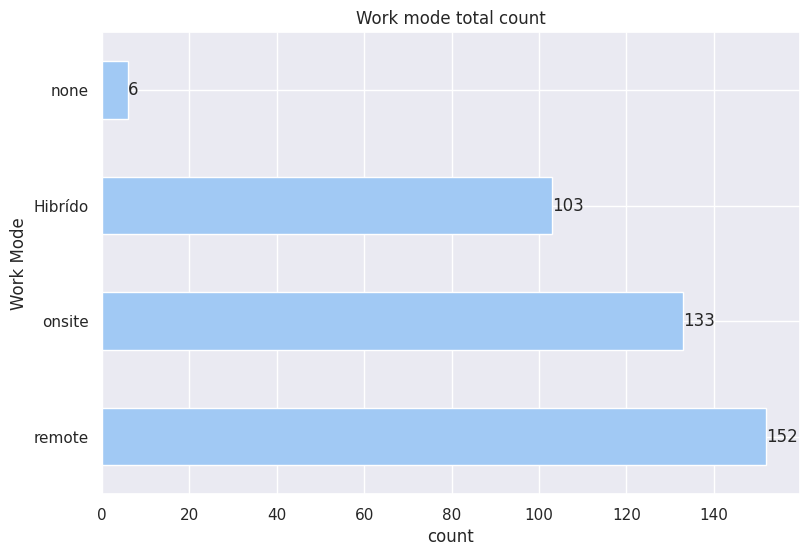

In [59]:
barh_chart_normal_count(
    df, "work_mode", title="Work mode total count", xlabel="count", ylabel="Work Mode"
)

## Modalidad de empleo


In [60]:
df.columns

Index(['work_mode', 'employment_mode', 'role', 'prog_skills_in_role',
       'code_for_job', 'IT_exp', 'prof_prog_exp', 'first_code',
       'assigned_seniority', 'self_assessed_seniority', 'formal_edu', 'majors',
       'formal_edu_importance', 'gender', 'age', 'monthly_salary',
       'pro_languages', 'web_frameworks', 'other_tools', 'databases',
       'platforms', 'fav_language', 'least_fav_language', 'fav_framework',
       'least_fav_framework', 'tools', 'use_AI_tools', 'AI_replace_dev',
       'layoffs_23_24', 'working_now', 'unemployed_duration', 'same_role',
       'current_vs_prev_salary'],
      dtype='object')

In [61]:
get_column_uniques(df, "employment_mode")

['Empleador local (Paraguay)',
 'foreign_employer',
 'freelance',
 'local_with_foreign_clients']

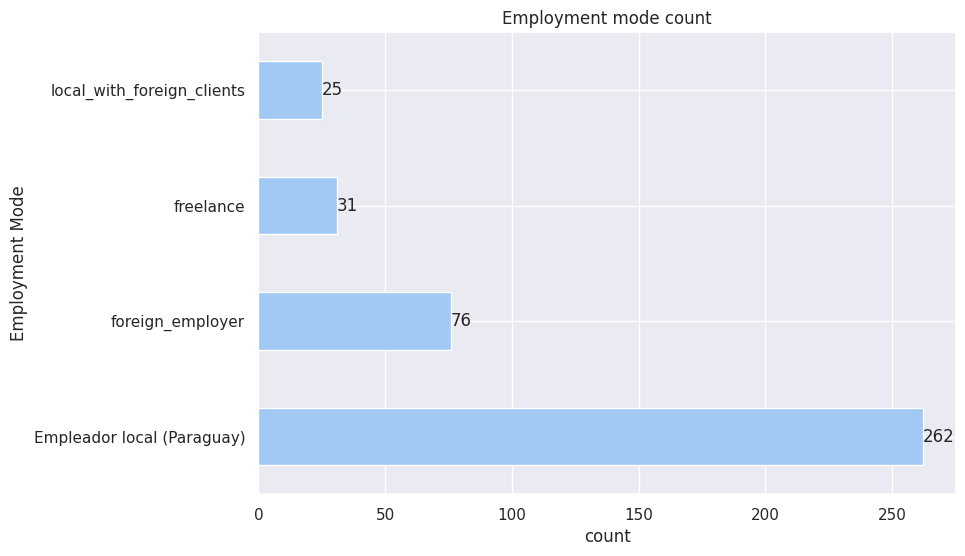

In [62]:
barh_chart_normal_count(
    df,
    "employment_mode",
    title="Employment mode count",
    xlabel="count",
    ylabel="Employment Mode",
)

## Puesto / rol


In [63]:
df.columns

Index(['work_mode', 'employment_mode', 'role', 'prog_skills_in_role',
       'code_for_job', 'IT_exp', 'prof_prog_exp', 'first_code',
       'assigned_seniority', 'self_assessed_seniority', 'formal_edu', 'majors',
       'formal_edu_importance', 'gender', 'age', 'monthly_salary',
       'pro_languages', 'web_frameworks', 'other_tools', 'databases',
       'platforms', 'fav_language', 'least_fav_language', 'fav_framework',
       'least_fav_framework', 'tools', 'use_AI_tools', 'AI_replace_dev',
       'layoffs_23_24', 'working_now', 'unemployed_duration', 'same_role',
       'current_vs_prev_salary'],
      dtype='object')

In [67]:
# Assuming get_column_uniques_count returns a Series object
role_counts = get_column_uniques_count(df, "role")
# Se omiten valores con "un" solo resultado.
role_counts_df = uniques_count_to_dataframe(role_counts, 20)

In [68]:
role_counts

role
full_stack_dev       170
backend_dev          140
frontend_dev          80
proj_lead             52
mobile_dev            51
desktop_apps          49
db_admin              49
data_analyst          33
dev_ops               32
data_eng              28
qa_testing            27
ux_ui                 14
data_sci              13
embedded_sys_dev      13
ai_specialist         10
game_dev               4
sys_analyst            2
qa_tester              1
cloud_dev              1
api_rest               1
tableau_dev            1
crm                    1
team_lead              1
platform_dev           1
tech_lead              1
jr_electrical_eng      1
quality_analyst        1
it_auditor             1
platform_eng           1
analyst_qa             1
dba                    1
software_arch          1
community_lead         1
it_analyst             1
solution_arch          1
tech_lead              1
ml_eng                 1
backend_arch           1
sys_arch               1
support_analyst     

In [69]:
md_table("rolecount_table", role_counts_df, "Roles total counts.")


        <center>
        <a id="rolecount_table"></a>
        
        | role             |   count |
|:-----------------|--------:|
| full_stack_dev   |     170 |
| backend_dev      |     140 |
| frontend_dev     |      80 |
| proj_lead        |      52 |
| mobile_dev       |      51 |
| desktop_apps     |      49 |
| db_admin         |      49 |
| data_analyst     |      33 |
| dev_ops          |      32 |
| data_eng         |      28 |
| qa_testing       |      27 |
| ux_ui            |      14 |
| data_sci         |      13 |
| embedded_sys_dev |      13 |
| ai_specialist    |      10 |
| game_dev         |       4 |
| sys_analyst      |       2 |
| qa_tester        |       1 |
| cloud_dev        |       1 |
| api_rest         |       1 |
        
        <p style="text-align: center;"><em>Roles total counts.</em></p>
        </center>
        <br/>
        <br/>
    


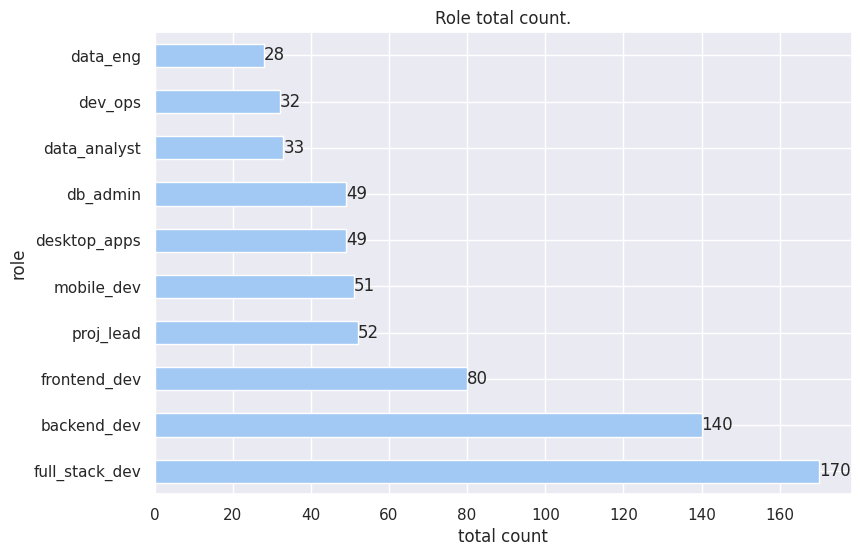

In [70]:
barh_chart_normal_count(df, "role", "Role total count.", "total count", "role")

## Modalidad vs Seniority asignado.

In [71]:
df.columns

Index(['work_mode', 'employment_mode', 'role', 'prog_skills_in_role',
       'code_for_job', 'IT_exp', 'prof_prog_exp', 'first_code',
       'assigned_seniority', 'self_assessed_seniority', 'formal_edu', 'majors',
       'formal_edu_importance', 'gender', 'age', 'monthly_salary',
       'pro_languages', 'web_frameworks', 'other_tools', 'databases',
       'platforms', 'fav_language', 'least_fav_language', 'fav_framework',
       'least_fav_framework', 'tools', 'use_AI_tools', 'AI_replace_dev',
       'layoffs_23_24', 'working_now', 'unemployed_duration', 'same_role',
       'current_vs_prev_salary'],
      dtype='object')

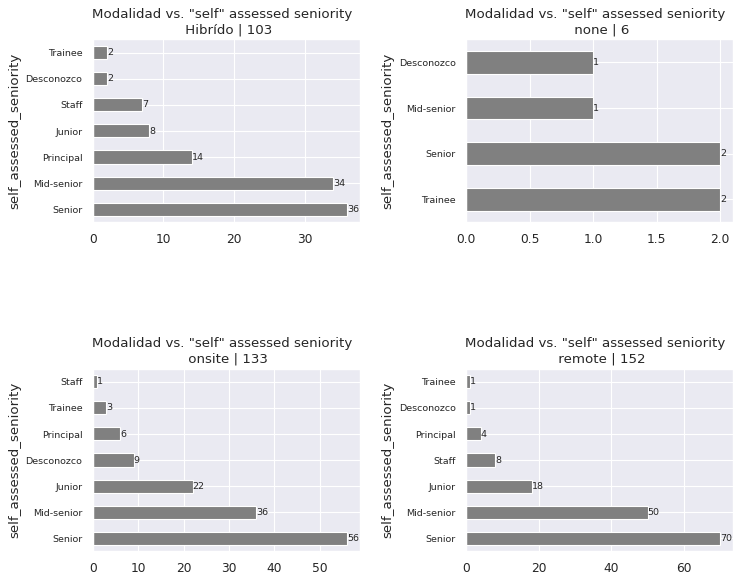

In [72]:
grouped_grid_barh_chart(
    df.groupby("work_mode"),
    "self_assessed_seniority",
    'Modalidad vs. "self" assessed seniority ',
    2,
    2,
    "gray",
    8.5,
)

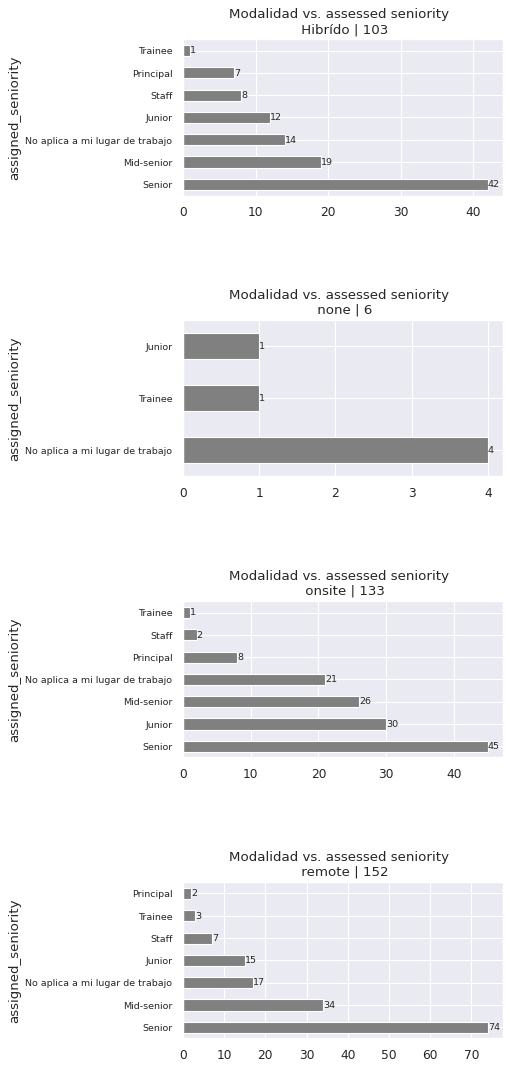

In [73]:
grouped_grid_barh_chart(
    df.groupby("work_mode"),
    "assigned_seniority",
    "Modalidad vs. assessed seniority ",
    5,
    1,
    "gray",
    8.5,
)

## Modalidad vs Seniority auto asignado.

## ¿Utilizás habilidades de programación en alguno de los siguientes roles/puestos?


In [74]:
df.columns

Index(['work_mode', 'employment_mode', 'role', 'prog_skills_in_role',
       'code_for_job', 'IT_exp', 'prof_prog_exp', 'first_code',
       'assigned_seniority', 'self_assessed_seniority', 'formal_edu', 'majors',
       'formal_edu_importance', 'gender', 'age', 'monthly_salary',
       'pro_languages', 'web_frameworks', 'other_tools', 'databases',
       'platforms', 'fav_language', 'least_fav_language', 'fav_framework',
       'least_fav_framework', 'tools', 'use_AI_tools', 'AI_replace_dev',
       'layoffs_23_24', 'working_now', 'unemployed_duration', 'same_role',
       'current_vs_prev_salary'],
      dtype='object')

In [75]:
# Get column uniques.
prog_in_rol_uniques = get_column_uniques(df, "prog_skills_in_role")

In [77]:
prog_in_rol_uniques

['devops_dataops',
 'scientific_researcher',
 'sys_admin',
 'designer',
 nan,
 'educator']

In [78]:
df["prog_skills_in_role"].value_counts()

prog_skills_in_role
sys_admin                                                               72
devops_dataops                                                          57
sys_admin, devops_dataops                                               37
designer                                                                19
sys_admin, educator                                                     12
sys_admin, designer                                                     11
educator                                                                 9
scientific_researcher                                                    6
sys_admin, devops_dataops, scientific_researcher                         6
devops_dataops, scientific_researcher                                    5
sys_admin, scientific_researcher, educator                               4
sys_admin, scientific_researcher                                         4
sys_admin, devops_dataops, designer                                      3
devop

In [82]:
# Obtenemos el conteo total por categoria.
prog_in_role_count = get_column_uniques_count(df, "prog_skills_in_role")
prog_in_role_df = uniques_count_to_dataframe(prog_in_role_count, 10)

In [83]:
prog_in_role_df

,role,count
0,sys_admin,155
1,devops_dataops,117
2,designer,40
3,educator,33
4,scientific_researcher,31


In [84]:
prog_in_role_df.columns

Index(['role', 'count'], dtype='object')

In [85]:
md_table("programming_in_role_table", prog_in_role_df, "Programming in role.")


        <center>
        <a id="programming_in_role_table"></a>
        
        | role                  |   count |
|:----------------------|--------:|
| sys_admin             |     155 |
| devops_dataops        |     117 |
| designer              |      40 |
| educator              |      33 |
| scientific_researcher |      31 |
        
        <p style="text-align: center;"><em>Programming in role.</em></p>
        </center>
        <br/>
        <br/>
    


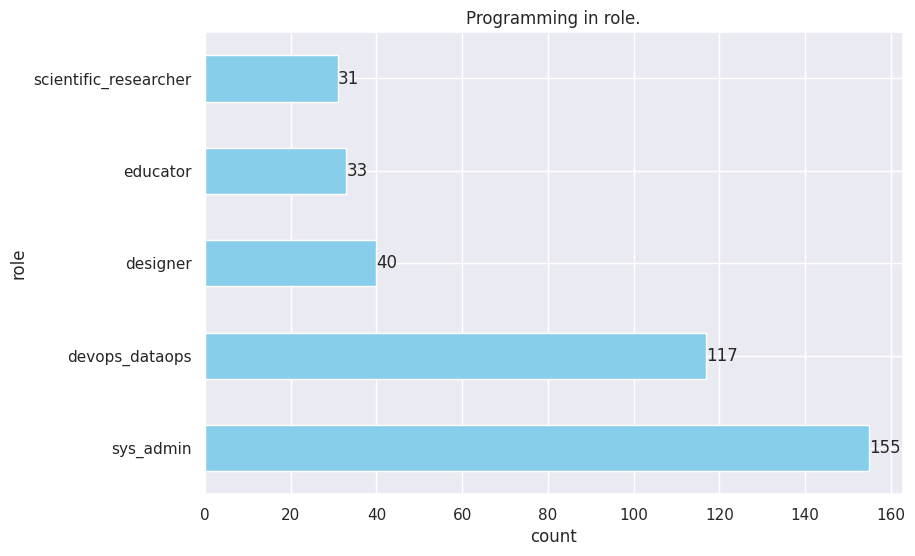

In [86]:
plot_uniques_count(prog_in_role_df, "Programming in role.", "count", "role")

## ¿Codificás por trabajo?


In [87]:
df.columns

Index(['work_mode', 'employment_mode', 'role', 'prog_skills_in_role',
       'code_for_job', 'IT_exp', 'prof_prog_exp', 'first_code',
       'assigned_seniority', 'self_assessed_seniority', 'formal_edu', 'majors',
       'formal_edu_importance', 'gender', 'age', 'monthly_salary',
       'pro_languages', 'web_frameworks', 'other_tools', 'databases',
       'platforms', 'fav_language', 'least_fav_language', 'fav_framework',
       'least_fav_framework', 'tools', 'use_AI_tools', 'AI_replace_dev',
       'layoffs_23_24', 'working_now', 'unemployed_duration', 'same_role',
       'current_vs_prev_salary'],
      dtype='object')

In [88]:
# Unique values in column.
get_column_uniques(df, "code_for_job")

['Yes', 'No']

In [89]:
prog_in_job_count = get_column_uniques_count(df, "code_for_job")

In [90]:
cod_for_job_df = uniques_count_to_dataframe(prog_in_job_count)

In [91]:
cod_for_job_df

,role,count
0,Yes,355
1,No,39


In [92]:
md_table("coding_for_job_table", cod_for_job_df, "Coding for job.")


        <center>
        <a id="coding_for_job_table"></a>
        
        | role   |   count |
|:-------|--------:|
| Yes    |     355 |
| No     |      39 |
        
        <p style="text-align: center;"><em>Coding for job.</em></p>
        </center>
        <br/>
        <br/>
    


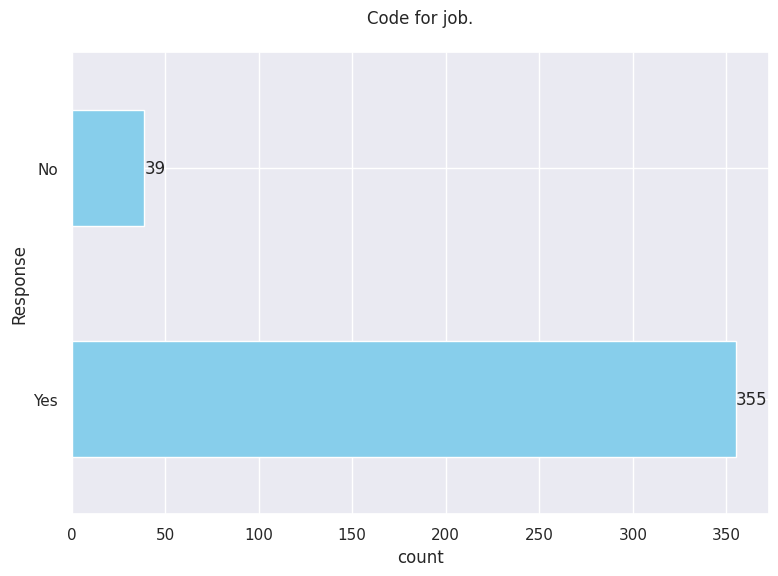

In [93]:
plot_uniques_count(cod_for_job_df, "Code for job.\n", "count", "Response")

## ¿Qué nivel te asignaron en tu trabajo?


In [94]:
df.columns

Index(['work_mode', 'employment_mode', 'role', 'prog_skills_in_role',
       'code_for_job', 'IT_exp', 'prof_prog_exp', 'first_code',
       'assigned_seniority', 'self_assessed_seniority', 'formal_edu', 'majors',
       'formal_edu_importance', 'gender', 'age', 'monthly_salary',
       'pro_languages', 'web_frameworks', 'other_tools', 'databases',
       'platforms', 'fav_language', 'least_fav_language', 'fav_framework',
       'least_fav_framework', 'tools', 'use_AI_tools', 'AI_replace_dev',
       'layoffs_23_24', 'working_now', 'unemployed_duration', 'same_role',
       'current_vs_prev_salary'],
      dtype='object')

In [95]:
# Get unique values in column.
get_column_uniques(df, "assigned_seniority")

['Mid-senior',
 'Junior',
 'Senior',
 'Principal',
 'No aplica a mi lugar de trabajo',
 'Trainee',
 'Staff']

In [96]:
get_column_uniques_count(df, "assigned_seniority")

assigned_seniority
Senior                             161
Mid-senior                          79
Junior                              58
No aplica a mi lugar de trabajo     56
Principal                           17
Staff                               17
Trainee                              6
Name: count, dtype: int64

In [97]:
len(df["assigned_seniority"])

394

In [98]:
df["assigned_seniority"]

0      Mid-senior
1          Junior
2          Senior
3       Principal
4          Senior
          ...    
389        Senior
390    Mid-senior
391        Senior
392        Junior
393        Senior
Name: assigned_seniority, Length: 394, dtype: object

In [99]:
assigned_seniority_df = uniques_count_to_dataframe(
    get_column_uniques_count(df, "assigned_seniority")
)

In [100]:
md_table(
    "assigned_seniority_table",
    assigned_seniority_df,
    "Assigned seniority.",
)


        <center>
        <a id="assigned_seniority_table"></a>
        
        | role                            |   count |
|:--------------------------------|--------:|
| Senior                          |     161 |
| Mid-senior                      |      79 |
| Junior                          |      58 |
| No aplica a mi lugar de trabajo |      56 |
| Principal                       |      17 |
| Staff                           |      17 |
| Trainee                         |       6 |
        
        <p style="text-align: center;"><em>Assigned seniority.</em></p>
        </center>
        <br/>
        <br/>
    


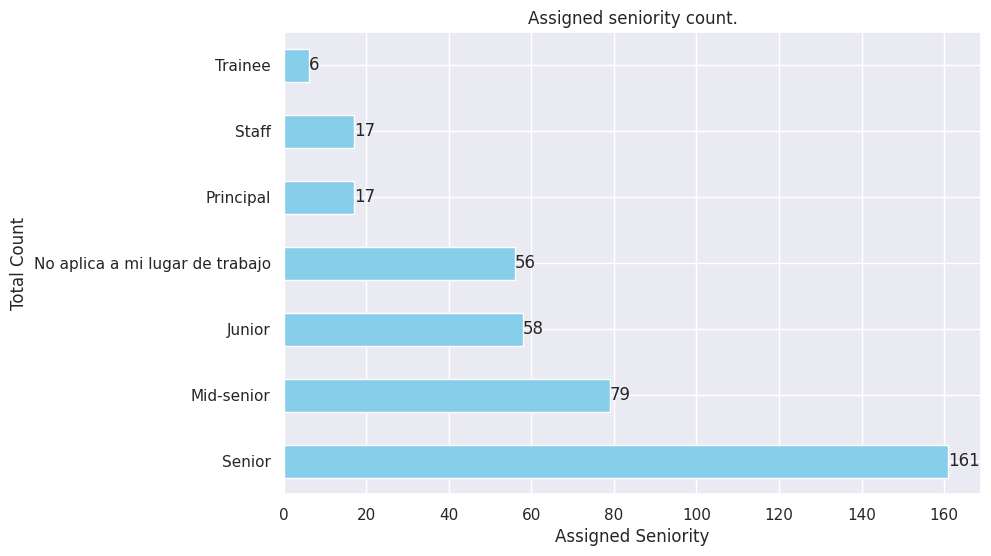

In [101]:
plot_uniques_count(
    assigned_seniority_df,
    "Assigned seniority count.",
    "Assigned Seniority",
    "Total Count",
)

## ¿Cuál considerás que es tu nivel en tu puesto?


In [102]:
# Obtener los valores unicos de la columna.
get_column_uniques(df, "self_assessed_seniority")

['Junior',
 'Senior',
 'Principal',
 'Mid-senior',
 'Trainee',
 'Desconozco',
 'Staff']

In [103]:
# Obtener el conteo total de la columns.

In [104]:
get_column_uniques_count(df, "self_assessed_seniority")

self_assessed_seniority
Senior        164
Mid-senior    121
Junior         48
Principal      24
Staff          16
Desconozco     13
Trainee         8
Name: count, dtype: int64

In [105]:
self_assigned_seniority_df = uniques_count_to_dataframe(
    get_column_uniques_count(df, "self_assessed_seniority")
)

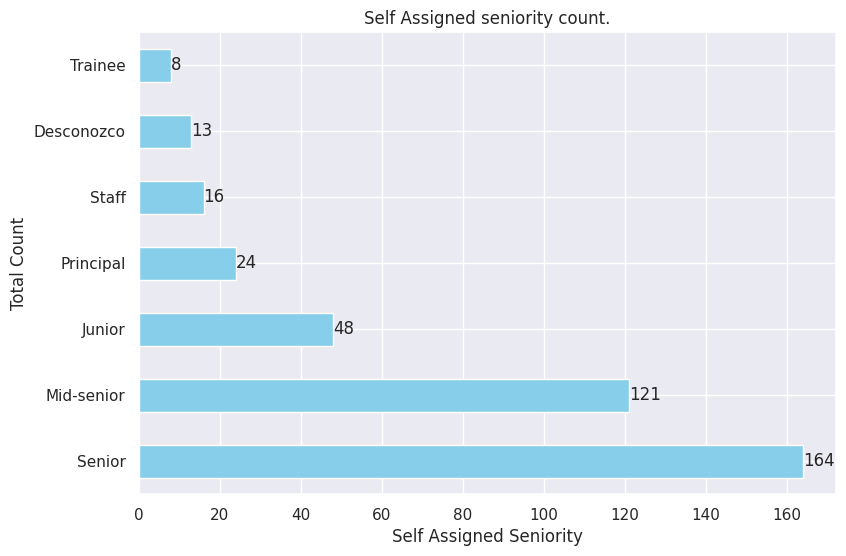

In [106]:
plot_uniques_count(
    self_assigned_seniority_df,
    "Self Assigned seniority count.",
    "Self Assigned Seniority",
    "Total Count",
)